# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name:

ID:1001669333

NetID:axs9333

References:

https://www.kaggle.com/kkooijman/pca-and-kmeans
https://www.kaggle.com/arthurtok/principal-component-analysis-with-kmeans-visuals
https://www.datasciencecentral.com/profiles/blogs/python-implementing-a-k-means-algorithm-with-sklearn
https://stackoverflow.com/questions/26851553/sklearn-agglomerative-clustering-linkage-matrix
https://scikit-learn.org/stable/
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py
https://stackoverflow.com/questions/22483588/how-can-i-plot-separate-pandas-dataframes-as-subplots


## Rules

1. Work is to be done individually.
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa4.ipynb' and submit it. 
5. Do not alter the dataset name.

## Assignment Details

The purpose of this assignment is to cluster drug users using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is part of "Drug consumption". You can find more information here: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#. The class attribute has been transformed into a binary classification where '0' indicates NOUSER and '1' indicates USER.

You need to submit this ipython file after renaming it. 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

In [2]:
# Import required Python packages here
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

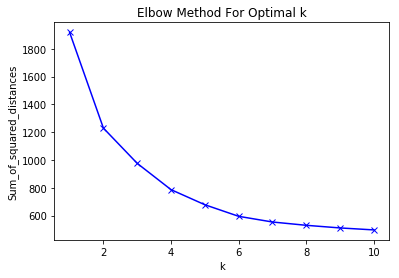

From the graph k=3, It is the optimal number of clusters with minimal sum of squared error.


In [3]:
#########################begin code for Task 1-a

# clustering dataset
# determine k using elbow method
df_drugsUser = pd.read_csv('drug_users.csv', encoding='latin1')

mms = MinMaxScaler()
data_transformed = mms.fit_transform(df_drugsUser)

Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
print("From the graph k=3, It is the optimal number of clusters with minimal sum of squared error.")
#########################end code for Task 1-a

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [4]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
### Important!!!

### Created training and testing datasets will be used for the rest of this assignment except Task 3.
x_train, x_test, y_train, y_test = train_test_split(df_drugsUser[df_drugsUser.columns.difference(['CLASS'])], df_drugsUser.CLASS, test_size=0.3)
###################end code for Task 1-b-1

cluster centers: [[ 1.27177034 -0.09690374]
 [-1.31292161  0.1000393 ]]


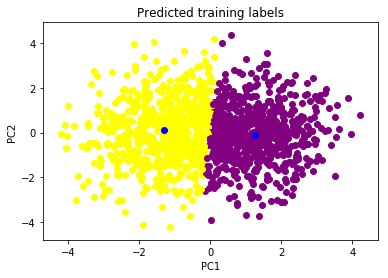

Color yellow represents Class 1
Color Purple represents Class 0


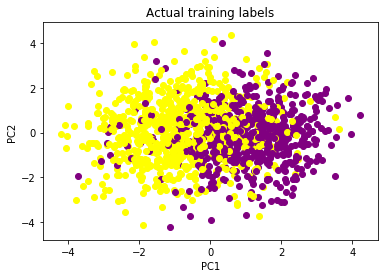

In [5]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model
kmeansTrain=KMeans(2)
#kmeansTest=KMeans(2)

# Model and fit the data to the PCA model
pca = PCA(2)
X_train_pca = pca.fit_transform(x_train)

# Compute cluster centers and predict cluster index for each sample 
kmeansTrainFit=kmeansTrain.fit(X_train_pca)
train_labels = kmeansTrainFit.predict(X_train_pca)
centers=kmeansTrain.cluster_centers_
print("cluster centers:",centers)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
#plt.scatter(x=x, y=y, c=kmeansTrain.labels_,)
for i in range(0, len(train_labels)):
    if train_labels[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.scatter(centers[0][0],centers[0][1],c='b')
plt.scatter(centers[1][0],centers[1][1],c='b')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()
print("Color yellow represents Class 1")
print("Color Purple represents Class 0")
for i in range(0, len(x)):
    if y_train.reset_index().CLASS[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()

###################end code for Task 1-b-2

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

cluster centers: [[ 1.27177034 -0.09690374]
 [-1.31292161  0.1000393 ]]


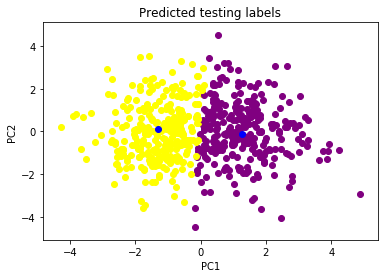

Color yellow represents Class 1
Color Purple represents Class 0


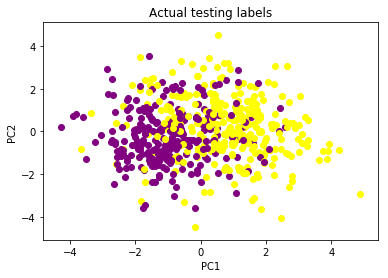

In [6]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels

# Model and fit the data to the PCA model
pca=PCA(2)
X_test_pca = pca.fit_transform(x_test)

# predict cluster index for each sample 
test_labels = kmeansTrain.predict(X_test_pca)
centers=kmeansTrain.cluster_centers_
print("cluster centers:",centers)


# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]
#plt.scatter(x=x, y=y, c=kmeansTest.labels_,) 
for i in range(0, len(test_labels)):
    if test_labels[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.scatter(centers[0][0],centers[0][1],c='b')
plt.scatter(centers[1][0],centers[1][1],c='b')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted testing labels')
plt.show()
print("Color yellow represents Class 1")
print("Color Purple represents Class 0")
for i in range(0, len(x)):
    if y_test.reset_index().CLASS[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual testing labels')
plt.show()


###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.


In [7]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix

kmeansTrain.fit(x_train, y_train)
y_pred = kmeansTrain.predict(x_test)
print(confusion_matrix(y_test, y_pred))

###################end code for Task 1-b-4


[[207  48]
 [ 78 233]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [8]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

map={}
## Calculate pairwise distance matrix for X_train
pdm_train_euclidean = pairwise_distances(x_train, metric='euclidean')
pdm_train_cosine = pairwise_distances(x_train, metric='cosine')
pdm_train_manhattan = pairwise_distances(x_train, metric='manhattan')

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
complete_cosine_clustering_fit = AgglomerativeClustering(n_clusters = 2,affinity='cosine',linkage='complete').fit_predict(pdm_train_cosine)
a=f1_score(y_train,complete_cosine_clustering_fit)
map.update( {a:'complete_cosine_clustering_fit'} )
## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
complete_euclidean_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='complete').fit_predict(pdm_train_euclidean)
b=f1_score(y_train,complete_euclidean_clustering_fit)
map.update( {b:'complete_euclidean_clustering_fit'} )

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
complete_manhattan_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='complete').fit_predict(pdm_train_manhattan)
c=f1_score(y_train,complete_manhattan_clustering_fit)
map.update( {c:'complete_manhattan_clustering_fit'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
average_cosine_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='cosine',linkage='average').fit_predict(pdm_train_cosine)
d=f1_score(y_train,average_cosine_clustering_fit)
map.update( {d:'average_cosine_clustering_fit'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
average_euclidean_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',linkage='average').fit_predict(pdm_train_euclidean)
e=f1_score(y_train,average_cosine_clustering_fit)
map.update( {e:'average_cosine_clustering_fit'} )

## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
average_manhattan_clustering_fit = AgglomerativeClustering(n_clusters = 2, affinity='manhattan',linkage='average').fit_predict(pdm_train_manhattan)
f=f1_score(y_train,average_manhattan_clustering_fit)
map.update( {f:'average_manhattan_clustering_fit'} )


print("F1-score for complete linkage + cosine", a)
print("F1-score for complete linkage + euclidean", b)
print("F1-score for complete linkage + manhattan", c)
print("F1-score for average linkage + cosine", d)
print("F1-score for average linkage + euclidean", e)
print("F1-score for average linkage + manhattan", f)
maxValue=max(a,b,c,d,e,f)
print("the best pair of linkage method and similarity measure :", maxValue, " is ", map.get(maxValue))

###################end code for Task 2-a

/Users/abhaysingh/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


F1-score for complete linkage + cosine 0.3057324840764331
F1-score for complete linkage + euclidean 0.6809881847475833
F1-score for complete linkage + manhattan 0.6954620010934937
F1-score for average linkage + cosine 0.730654761904762
F1-score for average linkage + euclidean 0.730654761904762
F1-score for average linkage + manhattan 0.0
the best pair of linkage method and similarity measure : 0.730654761904762  is  average_cosine_clustering_fit


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

average


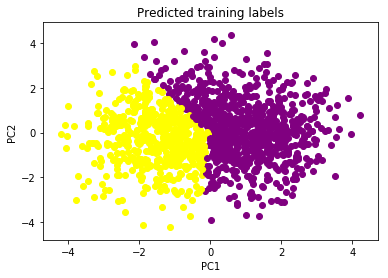

Color yellow represents Class 1
Color Purple represents Class 0


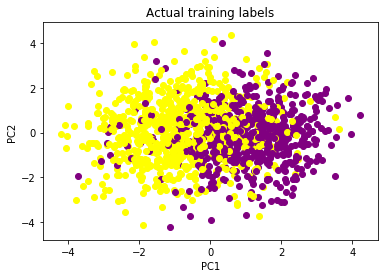

In [9]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
string=map.get(maxValue).split("_")
print(string[0])
# Visualize the predicted training labels versus actual training labels. 
bestAgglomerativeClustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
X_train_best_pca = bestAgglomerativeClustering.fit_predict(X_train_pca)

x = X_train_pca[:, 0]
y = X_train_pca[:, 1]
for i in range(1, len(X_train_best_pca)):
    if X_train_best_pca[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted training labels')
plt.show()
print("Color yellow represents Class 1")
print("Color Purple represents Class 0")
for i in range(0, len(x)):
    if y_train.reset_index().CLASS[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    plt.scatter(x=x[i],y=y[i],color=c1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Actual training labels')
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

/Users/abhaysingh/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:417: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


Color yellow represents Class 1
Color Purple represents Class 0


[]

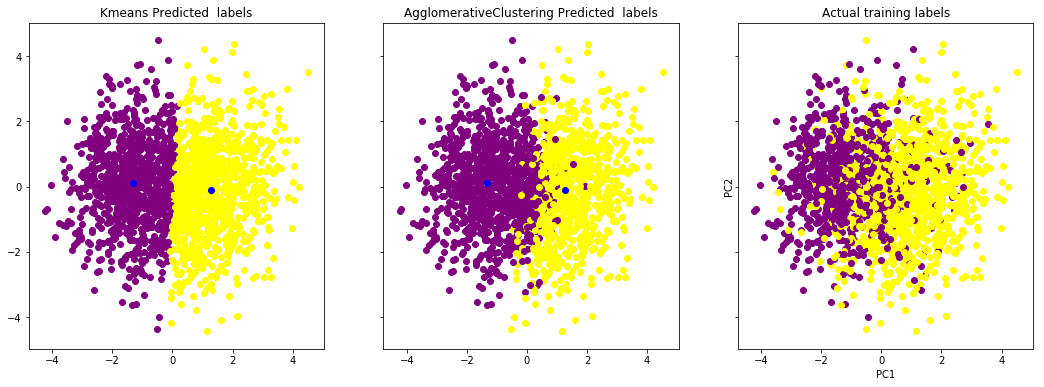

In [10]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
pca = PCA(2)
pcafitTransformed = pca.fit_transform(df_drugsUser)
kmean = KMeans(2)
kmeanModelFitPredict = kmean.fit_predict(pcafitTransformed)
cluster_center = kmean.cluster_centers_

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18, 6))



### Agglomerative Clustering
# Calculate pairwise distance matrix for X
best_pdm = pairwise_distances(df_drugsUser, metric=string[1])
# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
agglomerativeClustering = AgglomerativeClustering(n_clusters=2, affinity=string[1], linkage=string[0])  
agglomerativeClustering_fitPredict = agglomerativeClustering.fit_predict(best_pdm)

### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = None
x = pcafitTransformed[:, 0]
y = pcafitTransformed[:, 1]
#plt.scatter(x=x, y=y, c=kmeansTest.labels_,) 
for i in range(0, len(kmeanModelFitPredict)):
    if kmeanModelFitPredict[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    ax1.scatter(x=x[i],y=y[i],color=c1)
ax1.scatter(centers[0][0],centers[0][1],c='b')
ax1.scatter(centers[1][0],centers[1][1],c='b')  
ax1.set_title('Kmeans Predicted  labels')
ax1.plot()
print("Color yellow represents Class 1")
print("Color Purple represents Class 0")
for i in range(0, len(agglomerativeClustering_fitPredict)):
    if agglomerativeClustering_fitPredict[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    ax2.scatter(x=x[i],y=y[i],color=c1)
ax2.set_title('AgglomerativeClustering Predicted  labels')
ax2.plot()
for i in range(0, len(x)):
    if df_drugsUser.CLASS[i] == 0:
        c1 = 'purple'
    else:
        c1 = 'yellow'
    ax3.scatter(x=x[i],y=y[i],color=c1)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_title('Actual training labels')
ax3.plot()
# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 


###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [11]:
###################begin code for Task 3-b
from sklearn.metrics import classification_report

kmeanCompare = KMeans(2)
kMeanFitPredict = kmeanCompare.fit_predict(df_drugsUser)

X_train_best_pca_Whole = bestAgglomerativeClustering.fit_predict(df_drugsUser)

print("confusion_matrix for AgglomerativeClustering")
print(confusion_matrix(df_drugsUser.CLASS, X_train_best_pca_Whole))
print("confusion_matrix for kmeans")
print(confusion_matrix(df_drugsUser.CLASS, kMeanFitPredict))
print("classification_report for kmeans")
print(classification_report(df_drugsUser.CLASS, X_train_best_pca_Whole))
print("classification_report for kmeans")
print(classification_report(df_drugsUser.CLASS, kMeanFitPredict))


print("Reasoning: F1 Score is the weighted average of Precision and Recall. As the precision of kmeans is better, Kmeansclustering model is more useful. We have got recall of 0.80 which is good for this model as it’s above 0.5. ")
###################end code for Task 3-b

confusion_matrix for AgglomerativeClustering
[[230 610]
 [868 177]]
confusion_matrix for kmeans
[[716 124]
 [262 783]]
classification_report for kmeans
             precision    recall  f1-score   support

          0       0.21      0.27      0.24       840
          1       0.22      0.17      0.19      1045

avg / total       0.22      0.22      0.21      1885

classification_report for kmeans
             precision    recall  f1-score   support

          0       0.73      0.85      0.79       840
          1       0.86      0.75      0.80      1045

avg / total       0.80      0.80      0.80      1885

Reasoning: F1 Score is the weighted average of Precision and Recall. As the precision of kmeans is better, Kmeansclustering model is more useful. We have got recall of 0.80 which is good for this model as it’s above 0.5. 


## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[45 points] Task 1:</b>  

    [15 points] Task 1-a: Determine “k” value from the elbow method

    [30 points] Task 1-b: Visualization for K-Means Clustering

        [05 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [05 points] Task 1-b-4: Print out a confusion matrix
    


<b>[50 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [15 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points